In [2]:
using Plots
using LazySets
using Random

In [3]:
function plot_points(S::Matrix{<:Real}, w::Vector{<:Integer}, Π::Vector{<:Integer}=[0])
    S = Float64.(S)
    red_points = S[w.==1, :]
    blue_points = S[w.==-1, :]

    plt = scatter(size=(500, 500), legend=:none, 
                  xlims=(minimum(S[:,1])-1, maximum(S[:,1])+1),
                  ylims=(minimum(S[:,2])-1, maximum(S[:,2])+1), 
                  axis=0, framestyle=:box,
                  grid=0, color=:white)
    
    scatter!(plt, red_points[:, 1], red_points[:, 2], color=:red)
    scatter!(plt, blue_points[:, 1], blue_points[:, 2], color=:blue)
    
    if Π != [0]
        k = maximum(Π)        
        for j = 1:k
            j_points = S[Π .== j,:]
            j_set = [j_points[i,:] for i in 1:size(j_points,1)]
            j_hull = convex_hull(j_set)
            plot!(VPolygon(j_hull), color=:gray, alpha=0.2)
        end
        SΠ_disc = [abs(sum((Π.==j) .* (w.==1)) - sum((Π.==j) .* (w.==-1))) for j=1:k]
        println("Discrepancy = ", minimum(SΠ_disc), " = min",SΠ_disc)
    end
    
    return plt
end

plot_points (generic function with 2 methods)

Discrepancy = 1 = min[1, 1, 2]


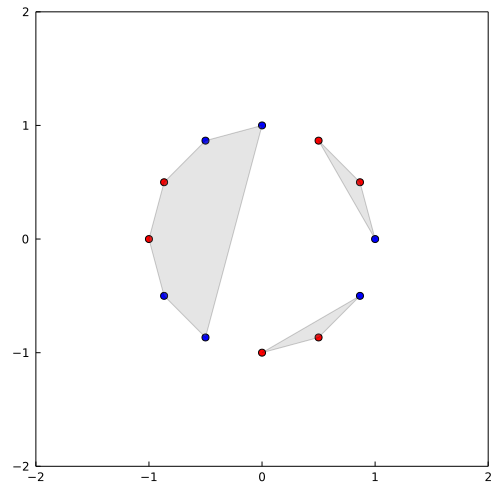

In [4]:
n = 12
S = zeros(12,2)
θ = 2π / n
for i = 1:n
    S[i,:] = [sin(θ*i), cos(θ*i)]
end
w = [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1]
Π = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
plot_points(S,w,Π)

Discrepancy = 1 = min[1, 1, 2]


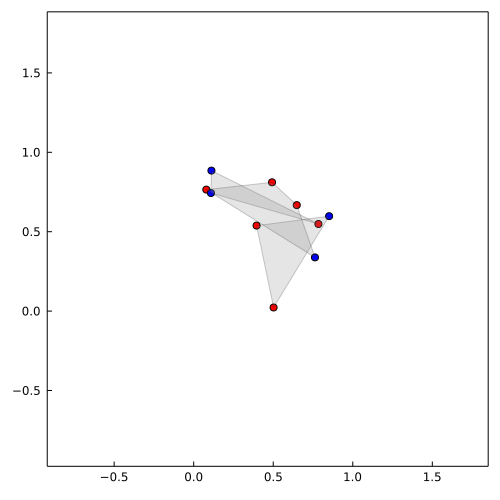

In [5]:
n = 10
S = rand(n,2)
w = rand([-1,1], n)
k = 3
Π = shuffle!(cat(collect(1:k), rand(1:k, n-k), dims=1)) # el collect es para tener al menos un pto por parte

# hasta aqui no hay chequeo de "convex partition" solo ploter y calculo discrepancia

plot_points(S,w,Π)

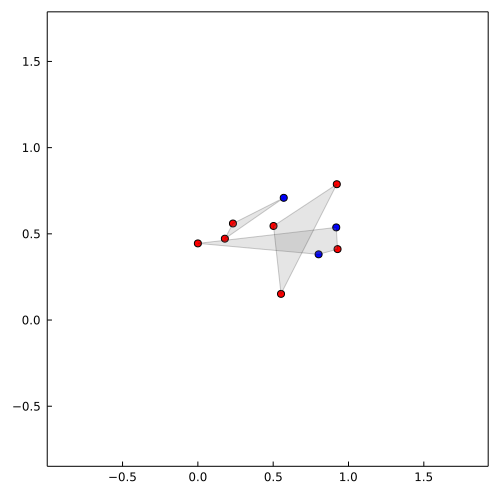

Discrepancy = 0 = min[0, 3, 1]


In [20]:
n = 10
S = rand(n,2)
w = rand([-1,1], n)
k = 3
Π = shuffle!(cat(collect(1:k), rand(1:k, n-k), dims=1)) # el collect es para tener al menos un pto por parte

display(plot_points(S,w,Π))

In [28]:
## Idea: calcular todas las particiones (con lo de abajo)
## Y descartar las no validas para calcular el corseness a la fuerza

hulls = Array{Array{Array{Float64, 1}, 1}, 1}(undef,k)
for j = 1:k
    j_points = S[Π .== j,:]
    j_set = [j_points[i,:] for i in 1:size(j_points,1)]
    hulls[j] = convex_hull(j_set)
end

isempty( VPolygon(hulls[2]) ∩ VPolygon(hulls[3]) )

true

In [6]:
## Esto calcula todas las S(n,k) [Stirling numbers of the second kind]
## particiones de tamaño repetidas k! veces por permutacion de nombres de partes...
## ARREGLAR!! como esta n = 8 ya es demaciado lento :P

n = 8
k = 5

Πk = Array{Int64,2}(undef,n,0)
for j = 1:k^n
    Π = mod.([ floor(Int,(j-1)/k^(i-1)) for i in 1:n],k).+1
    all_in = true
    for i = 1:k
        all_in = all_in * (i in Π)
    end

    
    if all_in
        Πk = hcat(Πk,Π)
    end
end
Πk

8×126000 Matrix{Int64}:
 5  4  5  3  4  3  5  4  5  2  4  2  5  …  4  2  4  1  2  1  3  2  3  1  2  1
 4  5  3  5  3  4  4  5  2  5  2  4  3     2  4  1  4  1  2  2  3  1  3  1  2
 3  3  4  4  5  5  2  2  4  4  5  5  2     1  1  2  2  4  4  1  1  2  2  3  3
 2  2  2  2  2  2  3  3  3  3  3  3  4     3  3  3  3  3  3  4  4  4  4  4  4
 1  1  1  1  1  1  1  1  1  1  1  1  1     5  5  5  5  5  5  5  5  5  5  5  5
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  5  5  5  5  5  5  5  5  5  5  5  5
 1  1  1  1  1  1  1  1  1  1  1  1  1     5  5  5  5  5  5  5  5  5  5  5  5
 1  1  1  1  1  1  1  1  1  1  1  1  1     5  5  5  5  5  5  5  5  5  5  5  5

In [10]:
126000/factorial(k)

1050.0